# Manipulating Satellite Imagery

This notebook demonstrates the workflow to create training and test datasets. Each dataset shall be saved in a specific folder that includes both imagery and masks. After the image are downloaded, one mask is generated for each image that contains annotations an `vgg json` file associated.

## Requirements

Import dependencies.

In [1]:
import json
import numpy as np
import os
from masks.waterMask import WaterMask
from datasets.sentinelTileService import SentinelTileService
from datasets.resic45 import Resic45
%matplotlib inline

The constants used in this notebook are defined as follows.

In [2]:
flag_download_dataset = 1
training_dataset_file_id = '14kkcuU6wd9UMvjaDrg3PNI-e_voCi8HL'
training_dataset_file_name = 'NWPU_images.zip'
water_bodies_file_name = 'datasets/water-bodies.json'
training_labels = ['nwpu_lakes_all_labels.json']
test_labels = ['all_labels.json']

## Download training and test images

The training dataset can be found as a zip drive in Google Drive.

In [26]:
if flag_download_dataset:
    resic45 = Resic45()
    resic45.download_file_from_google_drive(training_dataset_file_id, training_dataset_file_name)
    resic45.extract_and_clean_up(training_dataset_file_name)

downloading... Done.
uncompressing... Done.
clean up... Done.


The test dataset is based on the Sentinel-2 tile service. A list of water bodies can be found in a JSON file that includes proprieties such as name, country, layers, min latitude, max latitude, min longitude, and max longitude. The four last properties refers to the bonding box that is required by tile service.

The [OpenStreetMap](https://www.openstreetmap.org/) website was used to retrieve the bounding box for each water body.

In [3]:
if flag_download_dataset:
    water_bodies = json.load(open(water_bodies_file_name))
    for _, lake_properties in water_bodies.items():
        sentinel_service = SentinelTileService(**lake_properties)
        sentinel_service.download_all_layers()

downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/iran_urmia_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/bolivia_popoo_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/bolivia_popoo_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2017.jpg... Done.
downloading s2cloudless_imagery/data/greece_copais_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/united_states_mojave_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/united_states_mojave_s2cloudless_2018.jpg... Done.
downloading s2cloudless_imagery/data/kazahkstan_aral_s2cloudless_2016.jpg... Done.
downloading s2cloudless_imagery/data/kazahkstan_aral_s2cloudless_2018.jpg... Done.
downloading s2cloud

## Training dataset

Read all label files and consolidate them all in a merged dicitionary.

In [4]:
labels = {}
for training_label in training_labels:
    file_name = open(os.path.join('nwpu_labels', training_label))
    file = json.load(file_name)
    labels.update(file)

Read the label dictionary and create a list based on its key that stores the image file name.

In [5]:
images = sorted(labels.keys())
assert len(images) == 70

Generate all masks for the training dataset. The `WaterMask` class is responsible to read the image, read the annotations from the labels dictionary and generate the masks.

The class constructor requires only one parameter that is the directory where the images are saved on the disk. Then, the `create_mask` method is called passing the label dictionary and the image name. This process is repeated as part of a loop and one mask is generated for every image of the *images* list.

In [7]:
water_mask = WaterMask('nwpu_images')
for i in range(len(images)):
    water_mask.create_mask(labels, images[i])

Choose a random image from the training dataset.

In [8]:
image_id = np.random.randint(0, len(images))
randon_image = images[image_id]

A randon image is displayed with its annotations in the picture below.

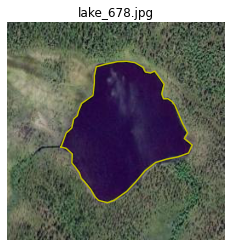

In [9]:
water_mask.display_image_with_annotations(randon_image, labels, 'y')

Finally, the corresponding water segmentation mask is displayed in the picture below.

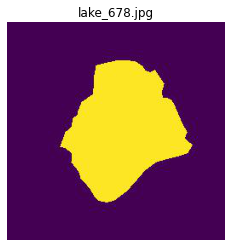

In [10]:
water_mask.display_mask(randon_image)

## Test dataset

Read all label files and consolidate them all in a merged dicitionary.

In [11]:
labels = {}
for test_label in test_labels:
    file_name = open(os.path.join('s2cloudless_labels', test_label))
    file = json.load(file_name)
    labels.update(file)

Read the label dictionary and create a list based on its key that stores the image file name.

In [12]:
images = sorted(labels.keys())
assert len(images) == 40

Generate all masks for the training dataset. The `WaterMask` class is responsible to read the image, read the annotations from the labels dictionary and generate the masks.

The class constructor requires only one parameter that is the directory where the images are saved on the disk. Then, the `create_mask` method is called passing the label dictionary and the image name. This process is repeated as part of a loop and one mask is generated for every image of the *images* list.

In [13]:
water_mask = WaterMask('s2cloudless_imagery')
for i in range(len(images)):
    water_mask.create_mask(labels, images[i])

Choose a random image from the training dataset.

In [14]:
image_id = np.random.randint(0, len(images))
randon_image = images[image_id]

A randon image is displayed with its annotations in the picture below.

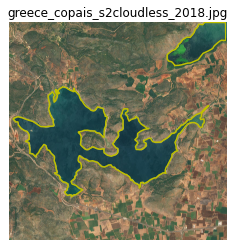

In [16]:
water_mask.display_image_with_annotations(randon_image, labels, 'y')

Finally, the corresponding water segmentation mask is displayed in the picture below.

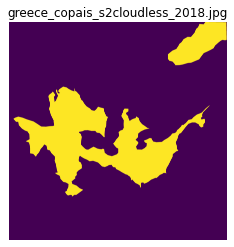

In [17]:
water_mask.display_mask(randon_image)